# Quiz 1
By Nutchanon Ninyawee, Std.ID 57070503410

In [15]:
import cv2
from matplotlib import pyplot as plt
from skimage import io, data
import numpy as np
plt.rcParams["figure.figsize"] = (16,4)

In [20]:
def RGB2BGR(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
def BGR2Gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [17]:
def showImgNb(img,*args,NotShow=False, fig_names=None):
    nImg = len(args) +1
    if nImg != 1:
        imgs = [img] + list(args)
        fig = plt.figure()
        for i, img in enumerate(imgs):
            a=fig.add_subplot(1,nImg,i+1)
            showImgNb(img, NotShow=True)
            if fig_names:
                a.set_title(fig_names[i])
            else:
                a.set_title(chr(ord('A')+i))
    else:
        if len(img.shape) == 3: # BGR img
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
        else: # grayscale
            plt.imshow(img, cmap='gray')
        if not NotShow:
            plt.show()

In [ ]:
def showImgNb(video,video2=None, video_names=None):
    nImg = video.shape[0]
    if video2:
        
        imgs = [img] + list(args)
        fig = plt.figure()
        for i, img in enumerate(imgs):
            a=fig.add_subplot(1,nImg,i+1)
            showImgNb(img, NotShow=True)
            if fig_names:
                a.set_title(fig_names[i])
            else:
                a.set_title(chr(ord('A')+i))
    else:
        fig = plt.figure()
        main=fig.add_subplot(4,2,[1 2 5 6])
        try:
            main_img = video[0,:,:,:] # bgr
        except:
            main_img = video[0,:,:] # gray scale
        showImgNb(img, NotShow=True)
            if fig_names:
                a.set_title(fig_names[i])
            else:
                a.set_title(chr(ord('A')+i))
        

## Q1: intro to cv2
3 points. Use OpenCV to display your input image and show its histogram.

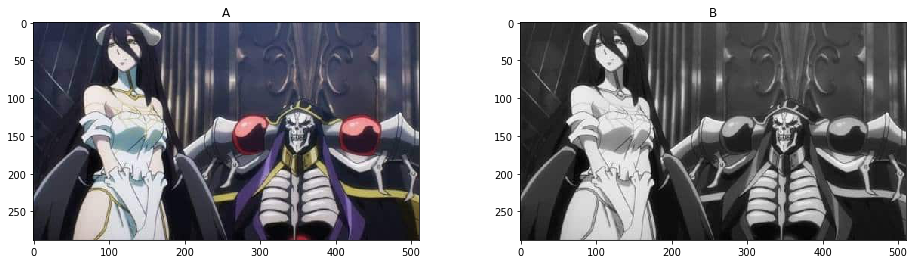

In [65]:
img = cv2.imread('img/overload.jpg')
gray_img = BGR2Gray(img)

showImgNb(img,gray_img)

In [9]:
def computeHistogram(gray_img):
    hist = np.bincount(gray_img.ravel(),minlength=256)
    return hist

In [35]:
hist = computeHistogram(gray_img)
hist.shape

(256,)

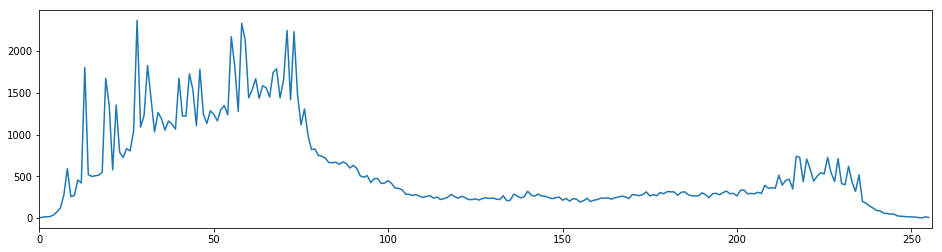

In [66]:
plt.plot(hist)
plt.xlim([0,256])
plt.show()

## Q2: automatic thresholding program
8 points. Use your own automatic thresholding program to a compute a threshold. What is
the threshold you computed? Use OpenCV to threshold the image into 2 colors using your
computed threshold. Print resulting new image.



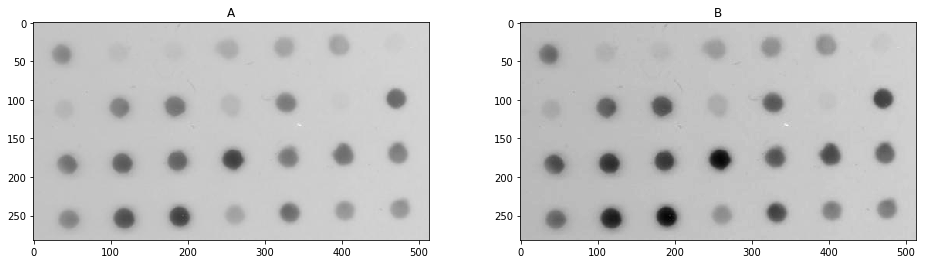

In [18]:
img = cv2.imread('img/dot-blot.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
g_img = BGR2Gray(img)
showImgNb(img, g_img)

In [11]:
def autoThreshold(gray_img):
    hist = computeHistogram(gray_img)
    T = int(round( np.sum(hist * np.arange(256))/np.sum(hist) ))
    oT = T # old T value
    iteration_count = 0
    
    while True:
        iteration_count += 1
        r1 = np.sum(hist[:T] * np.arange(256)[:T]) / np.sum(hist[:T])
        r2 = np.sum(hist[T:] * np.arange(256)[T:]) / np.sum(hist[T:])
        oT, T = T, int(round( (r1+r2)/2 ))
        if oT == T:
            break
    print(f"debug: run {iteration_count} times")
    return T

In [12]:
threshold = autoThreshold(g_img); threshold

debug: run 7 times


163

In [13]:
ret, b_img = cv2.threshold(g_img, threshold, 255, cv2.THRESH_BINARY)

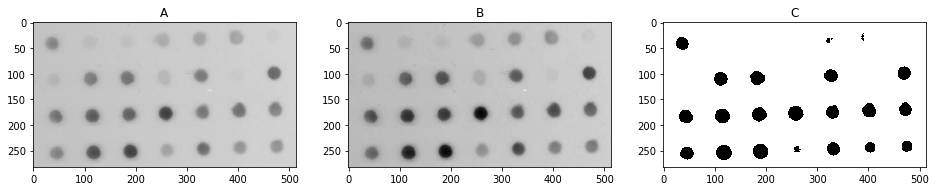

In [19]:
showImgNb(img, g_img, b_img)

## Q3: median filter
3 points. Using OpenCV, filter the original image using Median Filter of
1. 5 x 5
2. 11 x 11

Print the 2 images.

In [104]:
img = cv2.imread('img/noise.png')
g_img = BGR2Gray(img)
img.shape

(568, 382, 3)

In [105]:
mb5_g_img = cv2.medianBlur(g_img,5)
mb11_g_img = cv2.medianBlur(g_img,11)

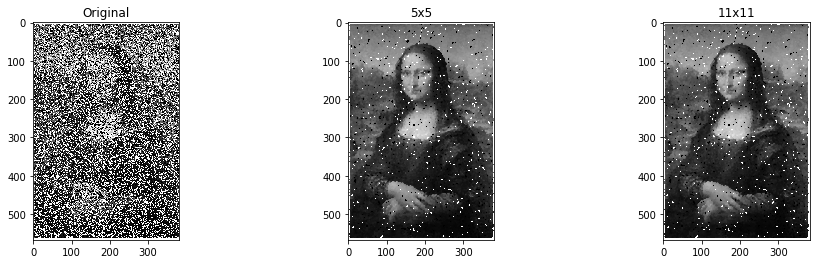

In [108]:
showImgNb(g_img,mb5_g_img, mb5_g_img,fig_names=['Original','5x5','11x11'])

## Q4: Gaussian Filter
4 points. Using OpenCV, filter a video sequence of 2-3 seconds using Gaussian Filter of 
1. 7x7 kernel (sd = 1.1?)  
2. 13 x 13 width (sd = 2?). 

Submit source video and 2 output videos.

In [28]:
import skvideo.io
import skvideo.datasets
videodata = skvideo.io.vread(skvideo.datasets.bigbuckbunny())
print(videodata.shape)

(132, 720, 1280, 3)


In [32]:
videodata = videodata.astype(np.uint8)
skvideo.io.vwrite("original.mp4", videodata)

In [29]:
new_video = []
for img in videodata:
    img = RGB2BGR(img)
    g_img = BGR2Gray(img)
    gbA_img = cv2.GaussianBlur(g_img, (7,7), 1.1)
    new_video.append(gbA_img)

new_video = np.stack(new_video)
new_video.shape

new_video = new_video.astype(np.uint8)
skvideo.io.vwrite("5x5video.mp4", new_video)

In [33]:
new_video = []
for img in videodata:
    img = RGB2BGR(img)
    g_img = BGR2Gray(img)
    gbA_img = cv2.GaussianBlur(g_img, (11,11), 2.0)
    new_video.append(gbA_img)

new_video = np.stack(new_video)
new_video.shape

new_video = new_video.astype(np.uint8)
skvideo.io.vwrite("11x11video.mp4", new_video)

## Q5: Write your own Gaussian Filter
### Gaussian mask
6 points. Compute and print the matrix for Gaussian mask with sd = 2 using kernel size of 13 x13 (we use width = ceiling (6*sd) ). Also show this matrix as an image by scaling max value to 255 so it is visible.

In [60]:
kernlen=13
nsig=1
    # index creation
minusN = int(-(kernlen-1)/2)
plusN = int((kernlen-1)/2)
i = j = np.arange(minusN,plusN+1)
ii, jj = np.meshgrid(i,j)




In [65]:
gm = np.e**(-(ii**2+jj**2)/(2*nsig**2))
gm



array([[2.31952283e-16, 5.67568523e-14, 5.10908903e-12, 1.69189792e-10,
        2.06115362e-09, 9.23744966e-09, 1.52299797e-08, 9.23744966e-09,
        2.06115362e-09, 1.69189792e-10, 5.10908903e-12, 5.67568523e-14,
        2.31952283e-16],
       [5.67568523e-14, 1.38879439e-11, 1.25015287e-09, 4.13993772e-08,
        5.04347663e-07, 2.26032941e-06, 3.72665317e-06, 2.26032941e-06,
        5.04347663e-07, 4.13993772e-08, 1.25015287e-09, 1.38879439e-11,
        5.67568523e-14],
       [5.10908903e-12, 1.25015287e-09, 1.12535175e-07, 3.72665317e-06,
        4.53999298e-05, 2.03468369e-04, 3.35462628e-04, 2.03468369e-04,
        4.53999298e-05, 3.72665317e-06, 1.12535175e-07, 1.25015287e-09,
        5.10908903e-12],
       [1.69189792e-10, 4.13993772e-08, 3.72665317e-06, 1.23409804e-04,
        1.50343919e-03, 6.73794700e-03, 1.11089965e-02, 6.73794700e-03,
        1.50343919e-03, 1.23409804e-04, 3.72665317e-06, 4.13993772e-08,
        1.69189792e-10],
       [2.06115362e-09, 5.04347663e-

In [69]:
gnn = np.full(gm.shape,gm.min())
gm/gnn



array([[1.00000000e+00, 2.44691932e+02, 2.20264658e+04, 7.29416370e+05,
        8.88611052e+06, 3.98247844e+07, 6.56599691e+07, 3.98247844e+07,
        8.88611052e+06, 7.29416370e+05, 2.20264658e+04, 2.44691932e+02,
        1.00000000e+00],
       [2.44691932e+02, 5.98741417e+04, 5.38969848e+06, 1.78482301e+08,
        2.17435955e+09, 9.74480345e+09, 1.60664647e+10, 9.74480345e+09,
        2.17435955e+09, 1.78482301e+08, 5.38969848e+06, 5.98741417e+04,
        2.44691932e+02],
       [2.20264658e+04, 5.38969848e+06, 4.85165195e+08, 1.60664647e+10,
        1.95729609e+11, 8.77199251e+11, 1.44625706e+12, 8.77199251e+11,
        1.95729609e+11, 1.60664647e+10, 4.85165195e+08, 5.38969848e+06,
        2.20264658e+04],
       [7.29416370e+05, 1.78482301e+08, 1.60664647e+10, 5.32048241e+11,
        6.48167448e+12, 2.90488497e+13, 4.78934563e+13, 2.90488497e+13,
        6.48167448e+12, 5.32048241e+11, 1.60664647e+10, 1.78482301e+08,
        7.29416370e+05],
       [8.88611052e+06, 2.17435955e+

In [71]:
Gm = np.round(gm/gnn)
Gm

array([[1.00000000e+00, 2.45000000e+02, 2.20260000e+04, 7.29416000e+05,
        8.88611100e+06, 3.98247840e+07, 6.56599690e+07, 3.98247840e+07,
        8.88611100e+06, 7.29416000e+05, 2.20260000e+04, 2.45000000e+02,
        1.00000000e+00],
       [2.45000000e+02, 5.98740000e+04, 5.38969800e+06, 1.78482301e+08,
        2.17435955e+09, 9.74480345e+09, 1.60664647e+10, 9.74480345e+09,
        2.17435955e+09, 1.78482301e+08, 5.38969800e+06, 5.98740000e+04,
        2.45000000e+02],
       [2.20260000e+04, 5.38969800e+06, 4.85165195e+08, 1.60664647e+10,
        1.95729609e+11, 8.77199251e+11, 1.44625706e+12, 8.77199251e+11,
        1.95729609e+11, 1.60664647e+10, 4.85165195e+08, 5.38969800e+06,
        2.20260000e+04],
       [7.29416000e+05, 1.78482301e+08, 1.60664647e+10, 5.32048241e+11,
        6.48167448e+12, 2.90488497e+13, 4.78934563e+13, 2.90488497e+13,
        6.48167448e+12, 5.32048241e+11, 1.60664647e+10, 1.78482301e+08,
        7.29416000e+05],
       [8.88611100e+06, 2.17435955e+

In [59]:
Gm = Gm/np.sum(Gm)
Gm

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [92]:
def Gaussian_Mask(kernlen=7, nsig=None):
    if not nsig:
        
    
    # index creation
    minusN = int(-(kernlen-1)/2)
    plusN = int((kernlen-1)/2)
    i = j = np.arange(minusN,plusN+1)
    ii, jj = np.meshgrid(i,j)
    
    gm = np.power(np.e,-(np.power(ii,2)+np.power(jj,2))/(2*np.power(nsig,2)))
    gnn = np.full(gm.shape,gm.min())
    Gm_pos = np.round(gm/gnn)
    Gm = Gm_pos/np.sum(Gm_pos)
    
    return Gm

Text(0.5,1,'13x13 sd=2')

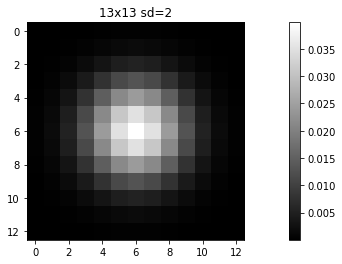

In [98]:
mask = Gaussian_Mask(13,2)
plt.imshow(mask, cmap='gray')
plt.colorbar()
plt.title('13x13 sd=2')

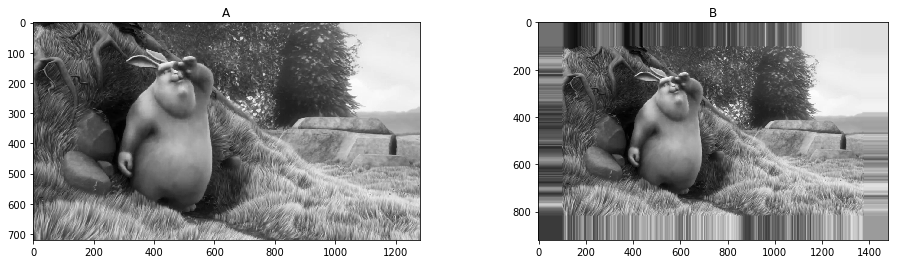

In [108]:
padsize = lambda x: ((x,x),(x,x))
pad_img = np.pad(g_img, padsize(100), 'edge')
showImgNb(g_img,pad_img)

In [ ]:
def applyGaussianFilter(g_img,kernsize,sd):

In [132]:
kernsize = 13
sd = 2

padsize = int((kernsize-1)/2)
kern = Gaussian_Mask(kernsize, sd)
getpadsize = lambda x: ((x,x),(x,x))
pad_img = np.pad(g_img, getpadsize(padsize), 'edge')

def getPadCoor(x,y): 
    return x+padsize, y+padsize
def getImagePart(pad_img,xy,padsize):
    x, y = xy
    return pad_img[y-padsize : (y+padsize+1) , x-padsize : x+padsize+1]
X, Y = g_img.shape

lst_img = []
for y in range(Y):
    row_img = []
    for x in range(X):
        s = np.sum(kern * getImagePart(pad_img,getPadCoor(x,y),padsize))
        row_img.append(s)
    lst_img.append(row_img)
new=np.array(lst_img)    
        

ValueError: operands could not be broadcast together with shapes (13,13) (12,13) 

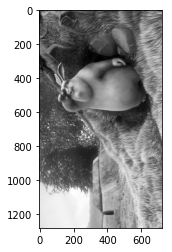

In [126]:
showImgNb(new)

In [119]:
new.shape

(1280, 720)